In [3]:
import sys
sys.path.append("..")
from jnk3_noask1.model_analysis.jnk3_no_ask1 import model
import numpy as np
from pysb.simulator import ScipyOdeSimulator
import matplotlib.pyplot as plt
from jnk3_noask1.model_analysis.equilibration_function import pre_equilibration


In [5]:
idx_pars_calibrate = [1, 15, 17, 19, 24, 25, 26, 27]
rates_of_interest_mask = [i in idx_pars_calibrate for i, par in enumerate(model.parameters)]

# calibrated_pars = np.load('jnk3_noASK1_calibrated_pars_pso_1h.npy')
fitted_pars = np.load('../jnk3_noask1/model_analysis/pydream_most_likely_par.npy')
param_values = np.array([p.value for p in model.parameters])

jnk3_initial_idxs = [35, 36, 37]
arrestin_idx = 32

par_set_calibrated = np.copy(param_values)
par_set_calibrated[rates_of_interest_mask] = 10 ** fitted_pars


In [6]:
def plot_arrestin_noarrestin_ppjnk3():
    # Pre-equilibration
    time_eq = np.linspace(0, 30, 30)
    pars_eq = np.copy(par_set_calibrated)
    pars_eq[[24, 25]] = 0  # Setting catalytic reactions to zero for pre-equilibration
    eq_conc1 = pre_equilibration(model, time_eq, pars_eq)[1]
    tspan = np.linspace(0, 60, 100)
    sim2 = ScipyOdeSimulator(model, tspan, param_values=par_set_calibrated, initials=eq_conc1).run().all

    # No arrestin experiments
    # Pre equilibration
    pars_eq[arrestin_idx] = 0
    pars_eq[jnk3_initial_idxs] = [0.492, 0.108, 0]
    eq_conc2 = pre_equilibration(model, time_eq, pars_eq)[1]

    par_set_calibrated[arrestin_idx] = 0
    par_set_calibrated[jnk3_initial_idxs] = [0.492, 0.108, 0]
    sim3 = ScipyOdeSimulator(model, tspan, param_values=par_set_calibrated, initials=eq_conc2).run().all

    plt.plot(tspan, sim2['all_jnk3'], color='r', label='ppJNK3 with Arrestin-3')
    plt.plot(tspan, sim3['all_jnk3'], color='k', label='ppJNK3 no Arrestin-3')
    plt.xlabel('Time (s)')
    plt.ylabel(r'Concentration [$\mu$M]')
    plt.legend()
    plt.show()
#     plt.savefig('plot_arrestin_noarrestin_ppjnk3.pdf', format='pdf', bbox_inches='tight')


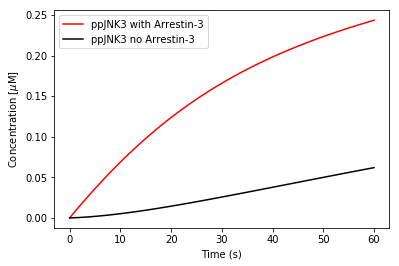

In [7]:
plot_arrestin_noarrestin_ppjnk3()